<a href="https://colab.research.google.com/github/schmelto/machine-learning/blob/main/Deeplearning/Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameters

The MNIST data set is used again here to show the influence of the learning rate on the performance of the network

## Import the required libraries and classes

In [2]:
# magic command for Colab Notebooks
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Input, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

# jupyters magic command
%matplotlib inline

## Loading the MNIST data set

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train), ' train images found')
print(len(x_test), ' test images found')

11493376/11490434 [==============================] - 0s 0us/step
60000  train images found
10000  test images found


## Adaptation of the MNIST data set

Here only 1/7 of the training data is used for training

In [4]:
NUM_PICTURES = len(x_train)//7
NUM_TEST_PICTURES = len(y_train)
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[:NUM_PICTURES]
y_train = y_train[:NUM_PICTURES]
x_test = x_test[:NUM_TEST_PICTURES]
y_test = y_test[:NUM_TEST_PICTURES]
print(len(x_train), ' train images used')
print(len(x_test), ' test images used')

8571  train images used
10000  test images used


Since Keras 4D expects tensors for processing, the data is reshaped here.

In [5]:
x_train = np.reshape(x_train, [len(x_train), 28, 28, 1])
x_test = np.reshape(x_test, [len(x_test), 28, 28, 1])
print('shape: ', x_train.shape)

shape:  (8571, 28, 28, 1)


To work with the Categorical Crossentropy function, the labels are converted into `categorical` labels

In [6]:
# convert class vectors to one-hot-encodings
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Helpers

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(title: str, history: "History", ylim: float = 0.6) -> None:
    y = history.history["accuracy"]
    y_test = history.history["val_accuracy"]
    plot_learning_curve(title, np.arange(1, 1 + len(y)), y, y_test, ylim)

## Hier wird das Model definiert

In [8]:
def get_untrained_model():
    # input images must have size 28x28px
    input_layer = Input(shape=(28, 28, 1))

    # Convolutional neural network
    model = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(input_layer)
    model = MaxPooling2D((2, 2))(model)
    model = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(model)
    model = MaxPooling2D((2, 2))(model)

    # Fully-Connected-Classifier
    model = Flatten()(model)
    model = Dense(100, activation='relu')(model)

    # Output Layer
    output_layer = Dense(10, activation='sigmoid')(model)
    
    return Model(input_layer, output_layer)

In [9]:
mnist_model = get_untrained_model()

mnist_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
mnist_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               80100 

## Here the models are trained at different learning rates

The following learning rates were used
- learning_rate = 0.001
- learning_rate = 0.00001
- learning_rate = 10

In [10]:
# compile model
model = get_untrained_model()
model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
268/268 [==============================] - 9s 7ms/step - loss: 1.0117 - accuracy: 0.6832 - val_loss: 0.1984 - val_accuracy: 0.9396
Epoch 2/10
268/268 [==============================] - 1s 5ms/step - loss: 0.1758 - accuracy: 0.9503 - val_loss: 0.1420 - val_accuracy: 0.9567
Epoch 3/10
268/268 [==============================] - 1s 5ms/step - loss: 0.1131 - accuracy: 0.9663 - val_loss: 0.0972 - val_accuracy: 0.9703
Epoch 4/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0774 - accuracy: 0.9773 - val_loss: 0.0971 - val_accuracy: 0.9682
Epoch 5/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0577 - accuracy: 0.9848 - val_loss: 0.0852 - val_accuracy: 0.9734
Epoch 6/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0382 - accuracy: 0.9872 - val_loss: 0.0840 - val_accuracy: 0.9742
Epoch 7/10
268/268 [==============================] - 1s 5ms/step - loss: 0.0291 - accuracy: 0.9928 - val_loss: 0.0707 - val_accuracy: 0.9783
Epoch 

In [11]:
mnist_model_low_lr = get_untrained_model()
mnist_model_low_lr.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.00001), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
    )
history_low_lr = mnist_model_low_lr.fit(
    x_train, 
    y_train, 
    batch_size = 32, 
    epochs = 10, 
    validation_data = (x_test, y_test)
    )

Epoch 1/10
268/268 [==============================] - 2s 6ms/step - loss: 2.2866 - accuracy: 0.1252 - val_loss: 2.2229 - val_accuracy: 0.2591
Epoch 2/10
268/268 [==============================] - 1s 5ms/step - loss: 2.1981 - accuracy: 0.3145 - val_loss: 2.1163 - val_accuracy: 0.4537
Epoch 3/10
268/268 [==============================] - 1s 5ms/step - loss: 2.0808 - accuracy: 0.4857 - val_loss: 1.9691 - val_accuracy: 0.5763
Epoch 4/10
268/268 [==============================] - 1s 5ms/step - loss: 1.9179 - accuracy: 0.5971 - val_loss: 1.7758 - val_accuracy: 0.6629
Epoch 5/10
268/268 [==============================] - 1s 5ms/step - loss: 1.7221 - accuracy: 0.6837 - val_loss: 1.5571 - val_accuracy: 0.7110
Epoch 6/10
268/268 [==============================] - 1s 5ms/step - loss: 1.5006 - accuracy: 0.7221 - val_loss: 1.3415 - val_accuracy: 0.7494
Epoch 7/10
268/268 [==============================] - 2s 6ms/step - loss: 1.2866 - accuracy: 0.7638 - val_loss: 1.1499 - val_accuracy: 0.7749
Epoch 

In [12]:
mnist_model_high_lr = get_untrained_model()
mnist_model_high_lr.compile(
    optimizer = tf.keras.optimizers.Adam(lr=10), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
    )
history_high_lr = mnist_model_low_lr.fit(
    x_train, 
    y_train, 
    batch_size = 32, 
    epochs = 10, 
    validation_data = (x_test, y_test)
    )

Epoch 1/10
268/268 [==============================] - 1s 5ms/step - loss: 0.7360 - accuracy: 0.8291 - val_loss: 0.6974 - val_accuracy: 0.8350
Epoch 2/10
268/268 [==============================] - 1s 5ms/step - loss: 0.6685 - accuracy: 0.8398 - val_loss: 0.6372 - val_accuracy: 0.8451
Epoch 3/10
268/268 [==============================] - 1s 6ms/step - loss: 0.6148 - accuracy: 0.8501 - val_loss: 0.5890 - val_accuracy: 0.8543
Epoch 4/10
268/268 [==============================] - 1s 5ms/step - loss: 0.5706 - accuracy: 0.8566 - val_loss: 0.5490 - val_accuracy: 0.8630
Epoch 5/10
268/268 [==============================] - 1s 5ms/step - loss: 0.5338 - accuracy: 0.8647 - val_loss: 0.5154 - val_accuracy: 0.8678
Epoch 6/10
268/268 [==============================] - 1s 5ms/step - loss: 0.5027 - accuracy: 0.8696 - val_loss: 0.4876 - val_accuracy: 0.8754
Epoch 7/10
268/268 [==============================] - 2s 6ms/step - loss: 0.4765 - accuracy: 0.8749 - val_loss: 0.4636 - val_accuracy: 0.8803
Epoch 

## Evaluation

Only the individual learning rates can be compared in the diagrams.

It should be noted that this, as the most important hyper parameter, has a very significant influence on training success

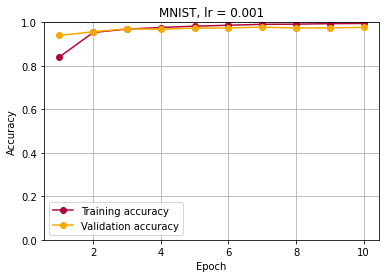

In [17]:
plot_history('MNIST, lr = 0.001', history, 0)

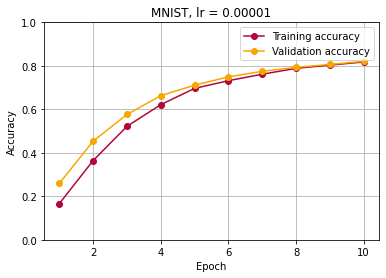

In [18]:
plot_history('MNIST, lr = 0.00001', history_low_lr, 0)

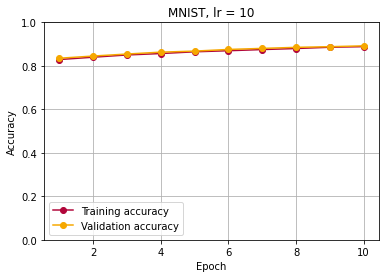

In [19]:
plot_history('MNIST, lr = 10', history_high_lr, 0)